# Risk Analysis (Bivariate EDA)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("loan_cleaned.csv")

In [4]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,dti,purpose,issue_d,loan_status,total_pymnt,default_flag,Profit,income_bucket,int_rate_bucket,issue_year,risk_category
0,5000,36,10.65,162.87,B,B2,10.0,24000.0,27.65,credit_card,2011-12-01,Fully Paid,5863.155187,0,863.155187,Low,Low,2011,Low / Moderate Risk
1,2500,60,15.27,59.83,C,C4,0.0,30000.0,1.00,car,2011-12-01,Charged Off,1008.710000,1,-1491.290000,Low,Medium,2011,High Risk
2,2400,36,15.96,84.33,C,C5,10.0,12252.0,8.72,small_business,2011-12-01,Fully Paid,3005.666844,0,605.666844,Low,Medium,2011,Low / Moderate Risk
3,10000,36,13.49,339.31,C,C1,10.0,49200.0,20.00,other,2011-12-01,Fully Paid,12231.890000,0,2231.890000,Mid,Medium,2011,Low / Moderate Risk
4,3000,60,12.69,67.79,B,B5,1.0,80000.0,17.94,other,2011-12-01,Current,3513.330000,0,513.330000,Mid,Medium,2011,Low / Moderate Risk


### Default Rate by Loan Grade

In [5]:
grade_default = (df.groupby('grade')['default_flag'].mean().sort_index())

In [6]:
grade_default

grade
A    0.059693
B    0.118552
C    0.166337
D    0.210665
E    0.251583
F    0.304099
G    0.319620
Name: default_flag, dtype: float64

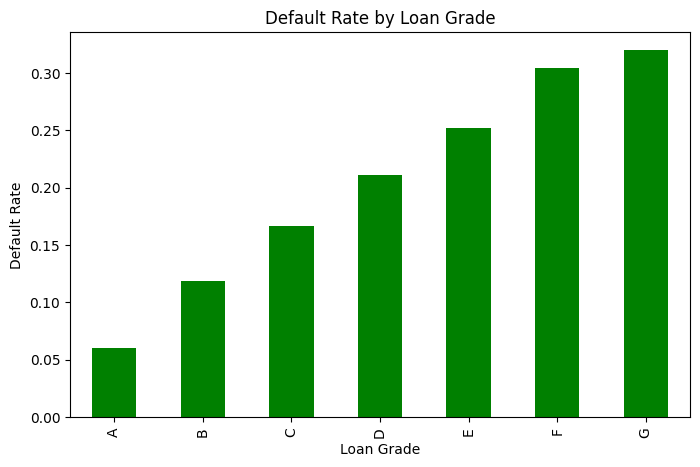

In [7]:
grade_default.plot(kind='bar', figsize=(8,5), color='green')
plt.title("Default Rate by Loan Grade")
plt.xlabel("Loan Grade")
plt.ylabel("Default Rate")
plt.show()

Default rates increase steadily from Grade A to Grade G, confirming that lower loan grades are associated with higher default risk and validating the lender’s risk grading framework.  

Risk of default rises as loan grade worsens.

### Default Rate by Interest Rate Bucket

In [8]:
int_rate_default = (df.groupby('int_rate_bucket')['default_flag'].mean())

In [9]:
int_rate_default

int_rate_bucket
High         0.253352
Low          0.114322
Medium       0.168414
Very High    0.339450
Very Low     0.053443
Name: default_flag, dtype: float64

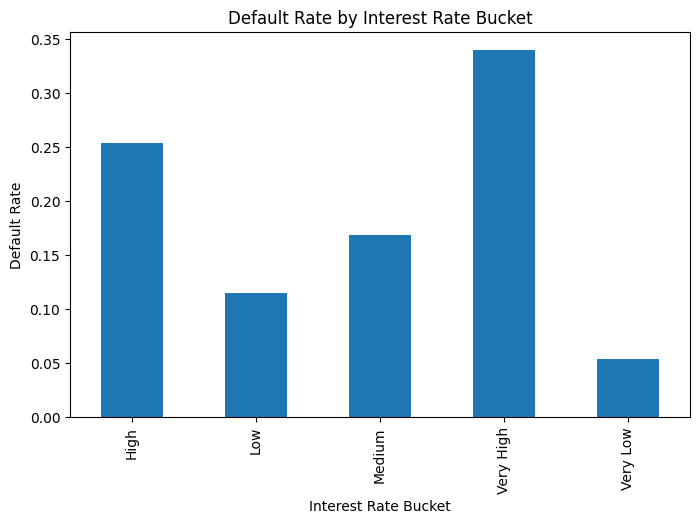

In [10]:
int_rate_default.plot(kind='bar', figsize=(8,5))
plt.title("Default Rate by Interest Rate Bucket")
plt.xlabel("Interest Rate Bucket")
plt.ylabel("Default Rate")
plt.show()

Default rates increase across higher interest rate buckets, confirming that loans priced at higher rates are associated with higher borrower risk, consistent with risk-based pricing.  

Higher interest rate loans default more often.

### Income vs Default Rate

In [11]:
income_default = (df.groupby('income_bucket')['default_flag'].mean())

In [12]:
income_default

income_bucket
High         0.106984
Low          0.177281
Mid          0.141404
Upper-Mid    0.109263
Very High    0.103147
Name: default_flag, dtype: float64

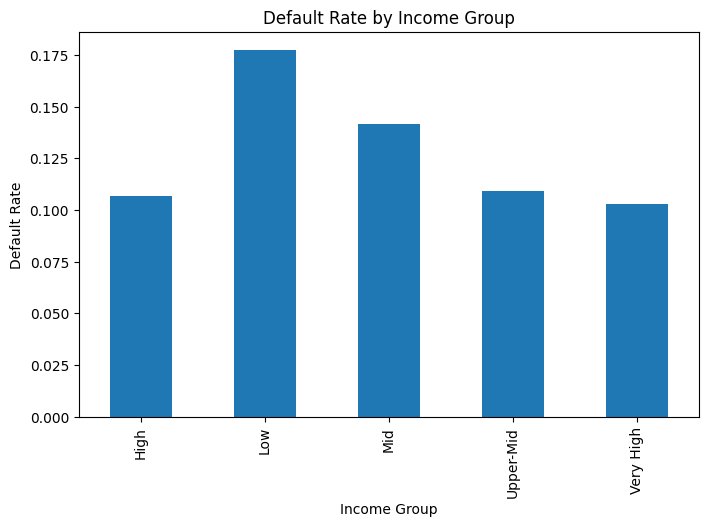

In [13]:
income_default.plot(kind='bar', figsize=(8,5))
plt.title("Default Rate by Income Group")
plt.xlabel("Income Group")
plt.ylabel("Default Rate")
plt.show()

While default rates tend to decrease with higher income, the relationship is **weaker and less consistent** than the strong monotonic increase observed across loan grades, indicating that loan grade is a stronger predictor of default risk than income alone.  

**Income affects default risk, but loan grade explains risk much better.**  

### Loan Purpose vs Default Risk

In [14]:
purpose_default = (df.groupby('purpose')['default_flag'].mean().sort_values(ascending=False))

In [15]:
purpose_default

purpose
small_business        0.259847
renewable_energy      0.184466
educational           0.172308
other                 0.158527
moving                0.157804
house                 0.154856
medical               0.152958
debt_consolidation    0.148436
vacation              0.139108
home_improvement      0.116599
credit_card           0.105653
car                   0.103292
major_purchase        0.101509
wedding               0.101373
Name: default_flag, dtype: float64

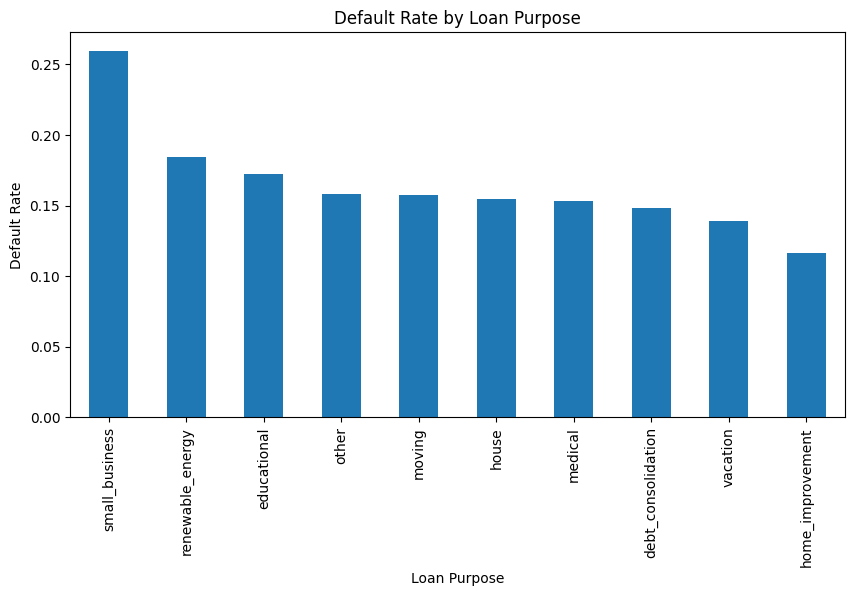

In [16]:
purpose_default.head(10).plot(kind='bar', figsize=(10,5))
plt.title("Default Rate by Loan Purpose")
plt.xlabel("Loan Purpose")
plt.ylabel("Default Rate")
plt.show()

Default rates vary significantly across loan purposes, with **small business, renewable_energy and educational loans** exhibiting higher risk, indicating purpose-specific risk profiles.  

Some loan purposes are riskier than others.  
**Loan purpose can be used as an important segmentation variable in risk modeling and policy design.**

### Interest Rate Distribution by Default Status

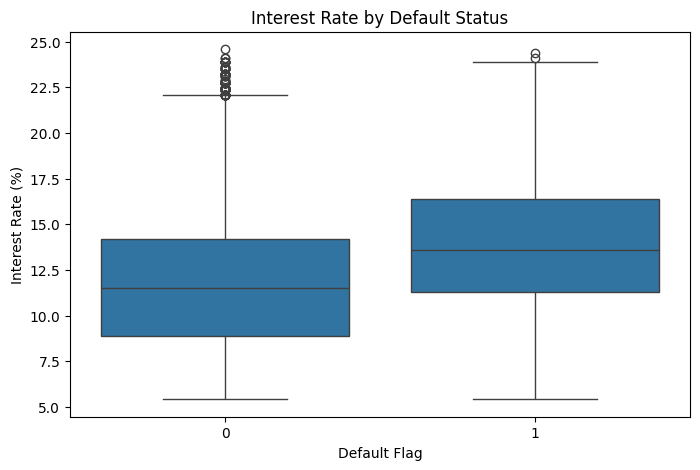

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(x='default_flag', y='int_rate', data=df)
plt.title("Interest Rate by Default Status")
plt.xlabel("Default Flag")
plt.ylabel("Interest Rate (%)")
plt.show()


Defaulted loans exhibit a higher median interest rate compared to non-defaulted loans, indicating effective risk-based pricing and clear differentiation between risky and safer borrowers.  

Defaulted loans usually have higher interest rates.

## Risk Analysis Insights    

- Default rates increase consistently as loan grades deteriorate  
- Higher interest rate buckets are strongly associated with higher default risk  
- Income shows a moderate influence on default probability compared to loan grade  
- Certain loan purposes exhibit significantly higher default risk than others  
- Interest rate distributions differ clearly between defaulted and non-defaulted loans  
